In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import os
import shutil
import zipfile
import numpy as np

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./credentials.json"
mlflow.set_tracking_uri("http://34.176.189.11:5000")

In [17]:
activations_run_id = "2efaf04494c84c4abebdea0f7095201e"

features_path = mlflow.artifacts.download_artifacts(
    run_id=activations_run_id, artifact_path="activations_data.zip"
)

folder_path = f"./activations_data_run_{activations_run_id}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
else:
    try:
        shutil.rmtree(folder_path)
    except FileNotFoundError:
        print(f"The folder '{folder_path}' does not exist.")
    os.makedirs(folder_path)

with zipfile.ZipFile(features_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [20]:
hidden_freqs = pd.read_csv(f"{folder_path}/activations_data/hidden_frequencies.csv")
feedforward_freqs = pd.read_csv(f"{folder_path}/activations_data/feedforward_frequencies.csv")

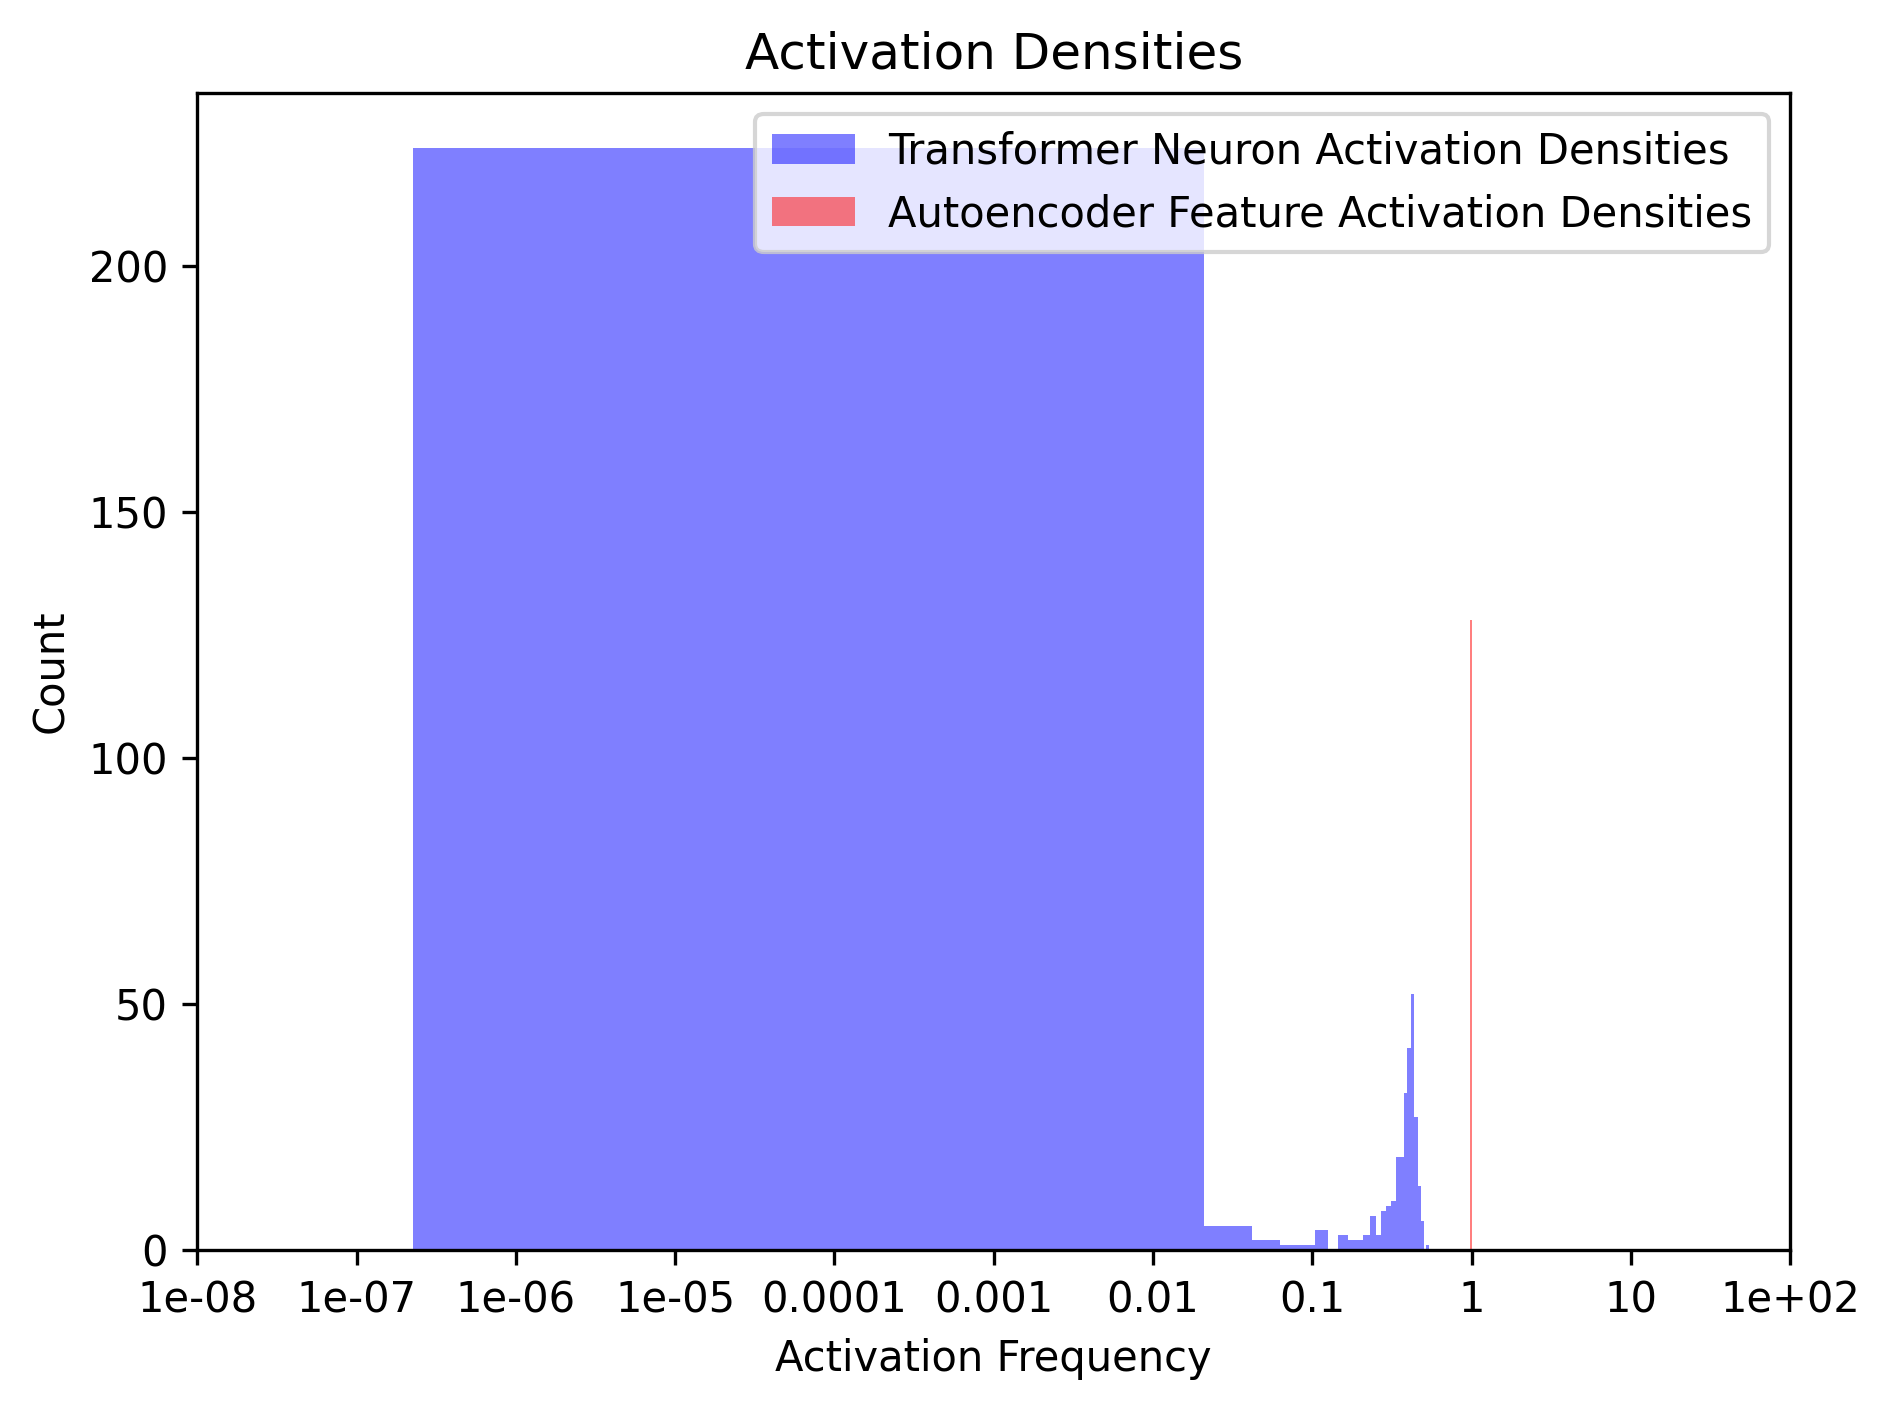

In [35]:
hiddens = hidden_freqs[hidden_freqs["frequency"] > 0]["frequency"]
bins=np.histogram(np.hstack((hiddens, feedforward_freqs["frequency"])), bins=48)[1]

plt.figure(dpi=300)
plt.title("Activation Densities")
plt.hist(hiddens, bins=bins, color='blue', alpha=0.5, label="Transformer Neuron Activation Densities")
plt.hist(feedforward_freqs["frequency"], bins=bins, color='red', alpha=0.5, label="Autoencoder Feature Activation Densities")
plt.xscale("log")
tick_locs = plt.xticks()[0]
tick_labels = [f"{x:.2g}" for x in tick_locs]
plt.xticks(tick_locs, tick_labels)
plt.xlabel("Activation Frequency")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.savefig("results/activation_densities.png")
plt.show()